# Recurrent Neural Network, 순환 신경망


### RNN 실습, 다음 수 예측( Many to One)
* RNN 구조를 직접 구현해서 다음 숫자 예측하는 실습    

#### 입출력 데이타 준비

In [1]:
import tensorflow as tf
import numpy as np

step_size = 4
batch_size = 5

x = [ [[i/10] for i in range(j, j+step_size)] for j in range(batch_size)]
y = [[ (i+step_size) /10] for i in range(batch_size)]
display("x", x, "y",y)

2022-10-05 13:14:05.878504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-05 13:14:05.973407: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-05 13:14:05.997476: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-05 13:14:06.556480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

'x'

[[[0.0], [0.1], [0.2], [0.3]],
 [[0.1], [0.2], [0.3], [0.4]],
 [[0.2], [0.3], [0.4], [0.5]],
 [[0.3], [0.4], [0.5], [0.6]],
 [[0.4], [0.5], [0.6], [0.7]]]

'y'

[[0.4], [0.5], [0.6], [0.7], [0.8]]

#### RNN을 이용한 다음 수 예측 실습

In [2]:
element_size = 1
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=[step_size, element_size]),
    tf.keras.layers.Dense(element_size)
])
model.summary()
model.compile(optimizer='adam', loss='mse')

model.fit(x, y, epochs=1000, verbose=0)
pred = model.predict(x)
print(f'prediction: {tf.squeeze(pred)}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


2022-10-05 13:14:07.169452: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-10-05 13:14:07.169477: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: lsg-82fg
2022-10-05 13:14:07.169481: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: lsg-82fg
2022-10-05 13:14:07.169565: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 520.61.5
2022-10-05 13:14:07.169577: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.61.5
2022-10-05 13:14:07.169580: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 520.61.5
2022-10-05 13:14:07.169931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical op

1/1 [==============================] - 0s 114ms/step
prediction: [0.40112707 0.49916562 0.59880775 0.69989085 0.8010329 ]


### Vanila RNN 실습2, Many to Many

#### 입출력 데이타 준비

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5*1024)])
        
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

c = tf.matmul(a, b)
print(c)
time.sleep(10)
import tensorflow as tf
import numpy as np

step_size = 4
batch_size = 5

x = [ [[i/10] for i in range(j, j+step_size)] for j in range(batch_size)]
y = [ [[i/10] for i in range(j+1, j+step_size+1)] for j in range(batch_size)]
display("x", x, "y",y)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


'x'

[[[0.0], [0.1], [0.2], [0.3]],
 [[0.1], [0.2], [0.3], [0.4]],
 [[0.2], [0.3], [0.4], [0.5]],
 [[0.3], [0.4], [0.5], [0.6]],
 [[0.4], [0.5], [0.6], [0.7]]]

'y'

[[[0.1], [0.2], [0.3], [0.4]],
 [[0.2], [0.3], [0.4], [0.5]],
 [[0.3], [0.4], [0.5], [0.6]],
 [[0.4], [0.5], [0.6], [0.7]],
 [[0.5], [0.6], [0.7], [0.8]]]

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=[step_size, element_size], return_sequences=True), # return_sequences 는 hidden의 값을 출력해줌
    tf.keras.layers.Dense(element_size)
])
model.summary()
model.compile(optimizer='adam', loss='mse')

model.fit(x, y, epochs=1000, verbose=0)
pred = model.predict(x)
print(f'prediction: {tf.squeeze(pred)}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 4, 10)             120       
                                                                 
 dense_1 (Dense)             (None, 4, 1)              11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 92ms/step
prediction: [[0.29076454 0.19477543 0.27296087 0.3572217 ]
 [0.29889733 0.30551872 0.41224083 0.524424  ]
 [0.3063929  0.41086856 0.52690285 0.64222926]
 [0.312501   0.50778234 0.6107118  0.7178371 ]
 [0.31654477 0.5944124  0.66458094 0.7634148 ]]


### 회귀 문제 ,  주식 가격 예측
#### Data Preparing

In [6]:
import numpy as np
import tensorflow  as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = 'stock.csv'
tf.random.set_seed(0)
seq_length = 7 # train with 7days features for next day close price
data_dim = 5 # 5 features


df = pd.read_csv(file_path, header=1)
display(df)
values = df.values
values = values[::-1]  # resverse because the data is fliped  

scaler = MinMaxScaler() # normalize
values_scaled = scaler.fit_transform(values)
X = []
y = []

for i in range(0, len(values) - seq_length):
    start, end = i, i+seq_length
    X.append(values_scaled[start: end]) # 5 features data of 7 days for input
    y.append(values_scaled[end, -1])    # 8th close price
X = np.array(X)
y = np.array(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

,# Open,High,Low,Volume,Close
0,828.659973,833.450012,828.349976,1247700,831.659973
1,823.020020,828.070007,821.655029,1597800,828.070007
2,819.929993,824.400024,818.979980,1281700,824.159973
3,819.359985,823.000000,818.469971,1304000,818.979980
4,819.000000,823.000000,816.000000,1053600,820.450012
...,...,...,...,...,...
727,599.992707,604.832763,562.192568,147100,567.002574
728,558.712504,568.452595,558.712504,7900,567.162558
729,566.892592,567.002574,556.932537,10800,556.972503
730,561.202549,566.432590,558.672539,41200,559.992565


((507, 7, 5), (218, 7, 5), (507,), (218,))

#### Model 정의

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(seq_length, data_dim), return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


#### Model Training

In [8]:
print(X_train.shape, y_train.shape)
history = model.fit(X_train, y_train
                    , epochs=200, batch_size=10
                    , validation_split=0.2, verbose=2)

(507, 7, 5) (507,)
Epoch 1/200
41/41 - 1s - loss: 0.0205 - mae: 0.1018 - val_loss: 0.0325 - val_mae: 0.1719 - 1s/epoch - 31ms/step
Epoch 2/200
41/41 - 0s - loss: 0.0051 - mae: 0.0522 - val_loss: 0.0032 - val_mae: 0.0412 - 101ms/epoch - 2ms/step
Epoch 3/200
41/41 - 0s - loss: 0.0043 - mae: 0.0493 - val_loss: 0.0093 - val_mae: 0.0787 - 101ms/epoch - 2ms/step
Epoch 4/200
41/41 - 0s - loss: 0.0036 - mae: 0.0428 - val_loss: 0.0029 - val_mae: 0.0400 - 100ms/epoch - 2ms/step
Epoch 5/200
41/41 - 0s - loss: 0.0043 - mae: 0.0459 - val_loss: 0.0040 - val_mae: 0.0467 - 104ms/epoch - 3ms/step
Epoch 6/200
41/41 - 0s - loss: 0.0031 - mae: 0.0403 - val_loss: 0.0031 - val_mae: 0.0411 - 100ms/epoch - 2ms/step
Epoch 7/200
41/41 - 0s - loss: 0.0031 - mae: 0.0397 - val_loss: 0.0039 - val_mae: 0.0466 - 101ms/epoch - 2ms/step
Epoch 8/200
41/41 - 0s - loss: 0.0031 - mae: 0.0378 - val_loss: 0.0026 - val_mae: 0.0382 - 100ms/epoch - 2ms/step
Epoch 9/200
41/41 - 0s - loss: 0.0023 - mae: 0.0358 - val_loss: 0.0024 

Epoch 73/200
41/41 - 0s - loss: 0.0013 - mae: 0.0249 - val_loss: 0.0013 - val_mae: 0.0271 - 112ms/epoch - 3ms/step
Epoch 74/200
41/41 - 0s - loss: 0.0013 - mae: 0.0250 - val_loss: 0.0012 - val_mae: 0.0265 - 109ms/epoch - 3ms/step
Epoch 75/200
41/41 - 0s - loss: 0.0013 - mae: 0.0244 - val_loss: 0.0014 - val_mae: 0.0288 - 98ms/epoch - 2ms/step
Epoch 76/200
41/41 - 0s - loss: 0.0014 - mae: 0.0254 - val_loss: 0.0014 - val_mae: 0.0283 - 99ms/epoch - 2ms/step
Epoch 77/200
41/41 - 0s - loss: 0.0013 - mae: 0.0248 - val_loss: 0.0025 - val_mae: 0.0393 - 115ms/epoch - 3ms/step
Epoch 78/200
41/41 - 0s - loss: 0.0014 - mae: 0.0257 - val_loss: 0.0012 - val_mae: 0.0261 - 114ms/epoch - 3ms/step
Epoch 79/200
41/41 - 0s - loss: 0.0013 - mae: 0.0237 - val_loss: 0.0012 - val_mae: 0.0264 - 114ms/epoch - 3ms/step
Epoch 80/200
41/41 - 0s - loss: 0.0012 - mae: 0.0239 - val_loss: 0.0018 - val_mae: 0.0331 - 109ms/epoch - 3ms/step
Epoch 81/200
41/41 - 0s - loss: 0.0012 - mae: 0.0241 - val_loss: 0.0013 - val_mae:

Epoch 144/200
41/41 - 0s - loss: 0.0011 - mae: 0.0227 - val_loss: 0.0015 - val_mae: 0.0303 - 105ms/epoch - 3ms/step
Epoch 145/200
41/41 - 0s - loss: 0.0011 - mae: 0.0225 - val_loss: 0.0014 - val_mae: 0.0304 - 101ms/epoch - 2ms/step
Epoch 146/200
41/41 - 0s - loss: 0.0012 - mae: 0.0222 - val_loss: 0.0012 - val_mae: 0.0272 - 119ms/epoch - 3ms/step
Epoch 147/200
41/41 - 0s - loss: 0.0011 - mae: 0.0224 - val_loss: 0.0011 - val_mae: 0.0260 - 119ms/epoch - 3ms/step
Epoch 148/200
41/41 - 0s - loss: 9.9385e-04 - mae: 0.0222 - val_loss: 0.0011 - val_mae: 0.0261 - 113ms/epoch - 3ms/step
Epoch 149/200
41/41 - 0s - loss: 0.0011 - mae: 0.0228 - val_loss: 0.0013 - val_mae: 0.0282 - 119ms/epoch - 3ms/step
Epoch 150/200
41/41 - 0s - loss: 0.0011 - mae: 0.0234 - val_loss: 0.0012 - val_mae: 0.0272 - 119ms/epoch - 3ms/step
Epoch 151/200
41/41 - 0s - loss: 0.0011 - mae: 0.0231 - val_loss: 0.0016 - val_mae: 0.0316 - 118ms/epoch - 3ms/step
Epoch 152/200
41/41 - 0s - loss: 0.0011 - mae: 0.0222 - val_loss: 0.

#### 훈련 결과 시각화

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


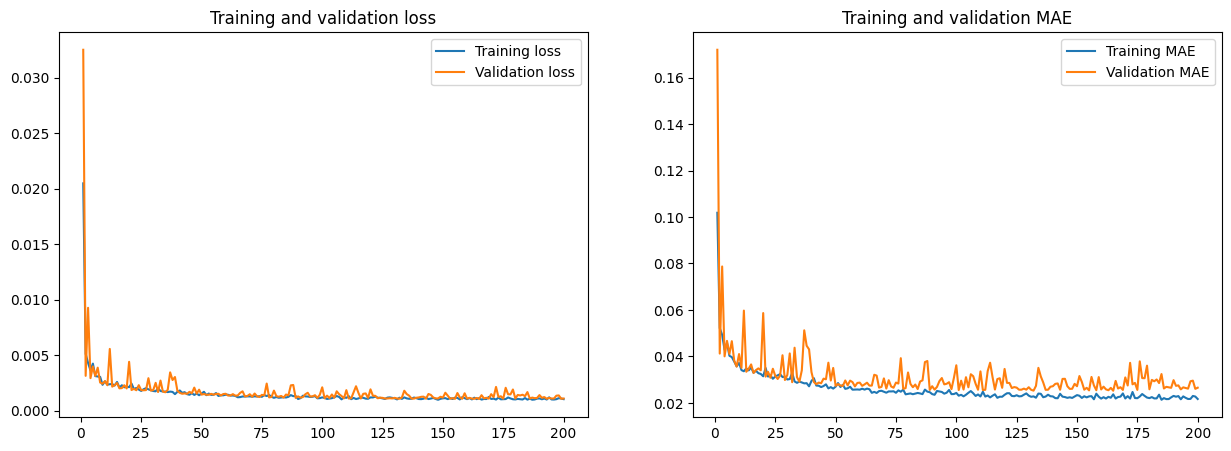

In [9]:
print(history.history.keys())

mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, mae,  label='Training MAE')
plt.plot(epochs, val_mae,  label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

#### Train Data 결과 예측 비교

16/16 [==============================] - 0s 1ms/step


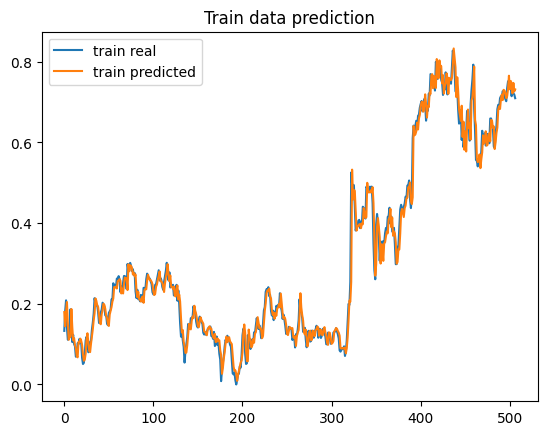

In [10]:
trainPredict = model.predict(X_train)

plt.plot(y_train, label="train real")
plt.plot(trainPredict, label="train predicted")
plt.title('Train data prediction')
plt.legend()

#### Test Data 결과 예측 비교

7/7 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Test data prediction')

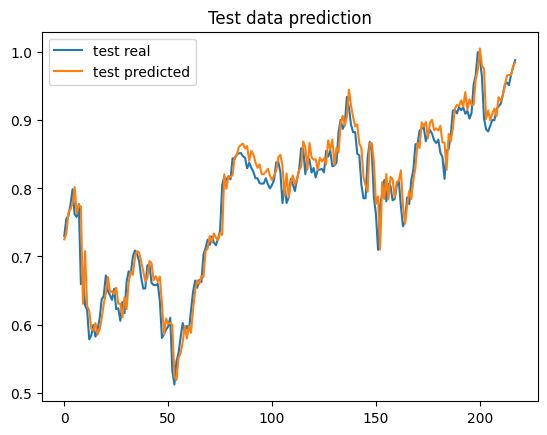

In [11]:
testPredict = model.predict(X_test)

plt.plot(y_test, label="test real")
plt.plot(testPredict, label="test predicted")
plt.legend()
plt.title('Test data prediction')

#### 평가

In [12]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 6.3638e-04 - mae: 0.0189


[0.0006363828433677554, 0.01885627768933773]

In [13]:
pred = model.predict(X_test[0:1])
print(pred, y_test[0])

# 역 스케일링
scaled = np.zeros((2,5))
scaled[0,-1] = y_test[0]
scaled[1,-1] = pred
scaler.inverse_transform(scaled)[:, -1]

1/1 [==============================] - 0s 13ms/step
[[0.72515833]] 0.7301802147545013


array([743.090027  , 741.36693053])

### Text 데이타 실습, One-hot Encoding


#### 입출력 데이타 준비

In [14]:
import tensorflow as tf
import numpy as np

sentence = "hihello"

voca = set(sentence) #unique charters
char2idx = {c:i for i,c in enumerate(voca)}
idx2char = {i:c for i, c in enumerate(voca)}
print(f'sentence:{sentence}')
print(f'char2idx:{char2idx}, idx2char:{idx2char}')

x = sentence[:-1] #"hihell"
y = sentence[1:] #"ihello"
print(f'x:{x}, y:{y}')

n_class = len(voca)  #example size
n_time_steps = len(x) #input sequence
hidden_size = n_class #output size

''' convert char to integer '''
x_idx = [char2idx[c] for c in x]
y_idx = [char2idx[c] for c in y]
print(f"x_idx:{x_idx}, y_idx:{y_idx}")

''' one-hot encoding'''
x_enc =tf.keras.utils.to_categorical(x_idx, num_classes=n_class)
x_enc = np.expand_dims(x_enc, axis=0)

y_enc = tf.keras.utils.to_categorical(y_idx, num_classes=n_class)
y_enc = np.expand_dims(y_enc, axis=0)
print("x_enc:", x_enc, x_enc.shape, )
print("y_enc:", y_enc, y_enc.shape)

sentence:hihello
char2idx:{'h': 0, 'e': 1, 'i': 2, 'o': 3, 'l': 4}, idx2char:{0: 'h', 1: 'e', 2: 'i', 3: 'o', 4: 'l'}
x:hihell, y:ihello
x_idx:[0, 2, 0, 1, 4, 4], y_idx:[2, 0, 1, 4, 4, 3]
x_enc: [[[1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]] (1, 6, 5)
y_enc: [[[0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0.]]] (1, 6, 5)


#### LSTM을 이용한 모델 학습

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(hidden_size, input_shape=(n_time_steps, n_class), return_sequences=True))
model.add(tf.keras.layers.Dense(hidden_size))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

n_epochs = 1000
history = model.fit(x_enc, np.reshape(y_idx, (1,6,1)), epochs=n_epochs, verbose=0)

preds = model.predict(x_enc)
print(preds, np.squeeze(np.argmax(preds, axis=2)))
print([idx2char[i] for i in np.squeeze(np.argmax(preds, axis=2))])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6, 5)              220       
                                                                 
 dense_3 (Dense)             (None, 6, 5)              30        
                                                                 
 activation (Activation)     (None, 6, 5)              0         
                                                                 
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 203ms/step
[[[8.2918704e-02 4.9110748e-02 8.3210576e-01 1.5711654e-02 2.0153053e-02]
  [8.4873694e-01 5.0377619e-02 5.3903922e-02 1.5723256e-02 3.1258203e-02]
  [2.3000810e-02 9.1400099e-01 4.8106957e-02 1.0703898e-04 1.4784191e-02]
  [1.5493242e-02 1.7295940e-02 1.2727924e-02 

### Keras Embedding Layer 실습
* 긍정/부정 어휘 분류

In [16]:
import tensorflow as tf

corpus = ['very good nice quality', # corpus = 말뭉치
             'stop lies',
             'ugly terrible', 
             'excellent work', 
             'adorable lovely', 
             'bad',
             'greate nice']

y_train = [1, 0, 0, 1, 1, 0, 1] #1 :pos, 0 : neg

t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(corpus)
vocab_size = len(t.word_index) + 1

print(f'vocab_size : {vocab_size}')

X_encoded = t.texts_to_sequences(corpus)
print(f'integer encoded: {X_encoded}')

max_len=max(len(l) for l in X_encoded)
print(f'max_len: {max_len}')

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train=np.array(y_train)
print(f'padded : {X_train}')

embd = tf.keras.layers.Embedding(vocab_size, 2, input_length=max_len)
print(f'embedding init : {embd(X_train)[:3]}')

model = tf.keras.Sequential()
model.add(embd) 
model.add(tf.keras.layers.Flatten()) # Dense의 입력으로 넣기위함.
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=500, verbose=0)

print(f'embedding last : {embd(X_train)[:3]}')

vocab_size : 15
integer encoded: [[2, 3, 1, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 1]]
max_len: 4
padded : [[ 2  3  1  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14  1  0  0]]
embedding init : [[[-0.03573694 -0.03169855]
  [-0.01025412  0.03373328]
  [-0.0485622  -0.04575492]
  [ 0.03325604 -0.0137823 ]]

 [[-0.04465365 -0.0398761 ]
  [ 0.01318571  0.04565645]
  [-0.04005826 -0.03061892]
  [-0.04005826 -0.03061892]]

 [[-0.02029233  0.04182185]
  [-0.02606738  0.01777536]
  [-0.04005826 -0.03061892]
  [-0.04005826 -0.03061892]]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 2)              30        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 

#### 벡터 시각화

[[ 0.36266038 -0.4684391 ]
 [-0.53081644  0.42412317]
 [-0.38171148  0.32748362]
 [-0.3923762   0.3754683 ]
 [-0.2994502  -0.45061293]
 [ 0.38435486 -0.48375124]
 [ 0.4822771  -0.37864175]
 [ 0.4119728  -0.40533656]
 [ 0.44632915 -0.40977237]
 [-0.41162154  0.4929658 ]
 [-0.52076334  0.44237325]
 [-0.45575634  0.44500288]
 [-0.49953902  0.40374178]
 [ 0.39250228 -0.4827028 ]
 [-0.4814194   0.443367  ]]


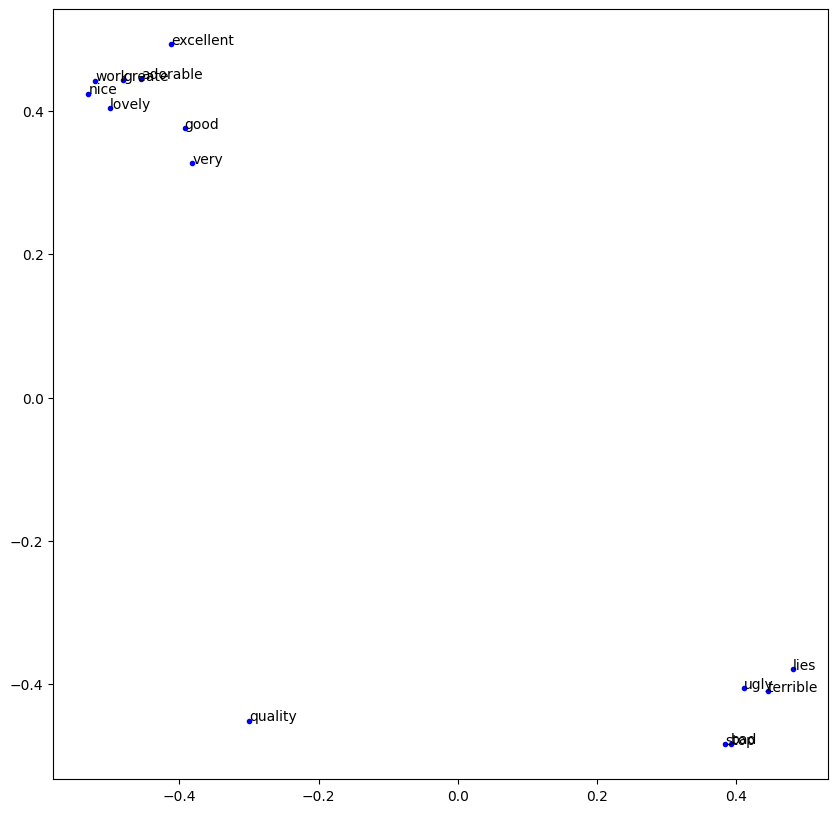

In [17]:
import matplotlib.pyplot as plt

embd_matrix = embd.get_weights()[0]
print(embd_matrix)
plt.figure(figsize=(10,10))  
for idx, (x1, x2) in enumerate(embd_matrix):
    if idx == 0 : continue
    plt.plot(x1, x2, 'b.')
    plt.annotate(t.index_word[idx], (x1,x2 ))

### Embeding Layer를 이용한 IMDB 텍스트 분류 실습


#### 데이타 준비

In [18]:
import tensorflow as tf

imdb = tf.keras.datasets.imdb

voca_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=voca_size)
print(f'train set : {len(X_train)}, test set: {len(X_test), }, classes : {max(y_train)+1}')

train set : 25000, test set: (25000,), classes : 2


#### 단어-인덱스 사전 생성

In [19]:
imdb_word_index = imdb.get_word_index()
imdb_index_word = { idx : key for key, idx in imdb_word_index.items()}

print(imdb_index_word[1], imdb_word_index['the'])

the 1


#### 데이타 미리보기

In [20]:
print(X_train[0][:20])

# 0:pad, 1:<start>, 2:UNK 
' '.join([imdb_index_word.get(i-3, '?') for i in X_train[0][:20]])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you"

#### 패딩

In [21]:
#padding
max_len = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

#### 모델 생성, 훈련, 평가

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(voca_size, 250))
model.add(tf.keras.layers.LSTM(120))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

result = model.evaluate(X_test, y_test)
print(f'cost :{result[0]}, accuracy:{result[1] * 100:.2f}%')

Epoch 1/20
391/391 [==============================] - 153s 388ms/step - loss: 0.4795 - acc: 0.7606 - val_loss: 0.3444 - val_acc: 0.8552
Epoch 2/20
391/391 [==============================] - 158s 404ms/step - loss: 0.2581 - acc: 0.8987 - val_loss: 0.3274 - val_acc: 0.8741
Epoch 3/20
391/391 [==============================] - 162s 414ms/step - loss: 0.1873 - acc: 0.9277 - val_loss: 0.3431 - val_acc: 0.8692
Epoch 4/20
391/391 [==============================] - 163s 418ms/step - loss: 0.1331 - acc: 0.9512 - val_loss: 0.3990 - val_acc: 0.8671
Epoch 5/20
391/391 [==============================] - 172s 440ms/step - loss: 0.1044 - acc: 0.9631 - val_loss: 0.4288 - val_acc: 0.8625
Epoch 6/20
391/391 [==============================] - 165s 422ms/step - loss: 0.0780 - acc: 0.9731 - val_loss: 0.4953 - val_acc: 0.8650
Epoch 7/20
391/391 [==============================] - 154s 395ms/step - loss: 0.0967 - acc: 0.9642 - val_loss: 0.4671 - val_acc: 0.8564
Epoch 8/20
391/391 [============================